## Author: Eslam Mohamed 
## Unsupervised Learning Project "Clustering"
## Machine Learning 2
## Project Description: Bank Customers Clustering 


In [1]:
# Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# - Constants and Functions Definition


In [36]:
# the data path on my machine
data_path = 'Customer Data.csv'
'''
===================================================================================
'''

# Function that fill nulls by median
def filling_nulls(DataFrame, cols):
    
    # Checking if there's is list of cols or one col only
    if type(cols) == list:
        
        # Iterate through each col of the list
        for i in range (len(cols)):
            # imputing with median
            DataFrame[cols[i]]= DataFrame[cols[i]].fillna(value = DataFrame[cols[i]].median())
    else:
        DataFrame[cols] = DataFrame[cols].fillna(value =DataFrame[cols].median())
    
    return DataFrame
'''
===================================================================================
'''

# Function to choose optimal eps depending on distances between points by NearesNeighbors algo.
def choose_eps(DataFrame):
    
    # Get the nearest 2 negihbors
    neigh = NearestNeighbors(n_neighbors=2)
    
    nbrs = neigh.fit(DataFrame)
    
    distances, indices = nbrs.kneighbors(DataFrame)
    
    distances = np.sort(distances, axis=0)
    
    print(distances)
    
    plt.plot(distances[:,1])

In [37]:
# Reading the Data
df = pd.read_csv(data_path)

# 1- Starting EDA

In [4]:
# Data Info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Columns Description
1. CUSTID : Identification of Credit Card holder (Categorical)
2. BALANCE : Balance amount left in their account to make purchases 
3. BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES : Amount of purchases made from account
5. ONEOFFPURCHASES : Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES : Amount of purchase done in installment
7. CASHADVANCE : Cash in advance given by the user
8. PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

9. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done  (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
12. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
13. PURCHASESTRX : Numbe of purchase transactions made
14. CREDITLIMIT : Limit of Credit Card for user
15. PAYMENTS : Amount of Payment done by user
16. MINIMUM_PAYMENTS : Minimum amount of payments made by user
17. PRCFULLPAYMENT : Percent of full payment paid by user
18. TENURE : Tenure of credit card service for user

In [5]:
# See sample of the data 
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
269,C10280,2554.525229,1.000000,6186.77,6099.08,87.69,1898.690655,0.916667,0.750000,0.250000,0.083333,1,38,10950.0,11198.926130,608.368860,0.083333,12
5276,C15424,1621.345326,1.000000,5167.60,4246.50,921.10,0.000000,1.000000,1.000000,0.833333,0.000000,0,52,5000.0,2721.870415,523.348392,0.000000,12
6870,C17058,1.310749,0.090909,29.90,29.90,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,6000.0,38.718362,18.928972,0.000000,12
6098,C16269,1132.798883,1.000000,411.24,242.45,168.79,0.000000,0.500000,0.333333,0.416667,0.000000,0,13,3000.0,814.752576,706.375896,0.000000,12
2528,C12602,126.134681,1.000000,1197.12,1197.12,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,9000.0,936.326494,180.002457,0.454545,12


In [6]:
#See Description numeric columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# See Null values as percentage of the whole data
round(df.isnull().sum(axis = 0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [8]:
# See if there is duplicated rows

df.duplicated().sum()

0

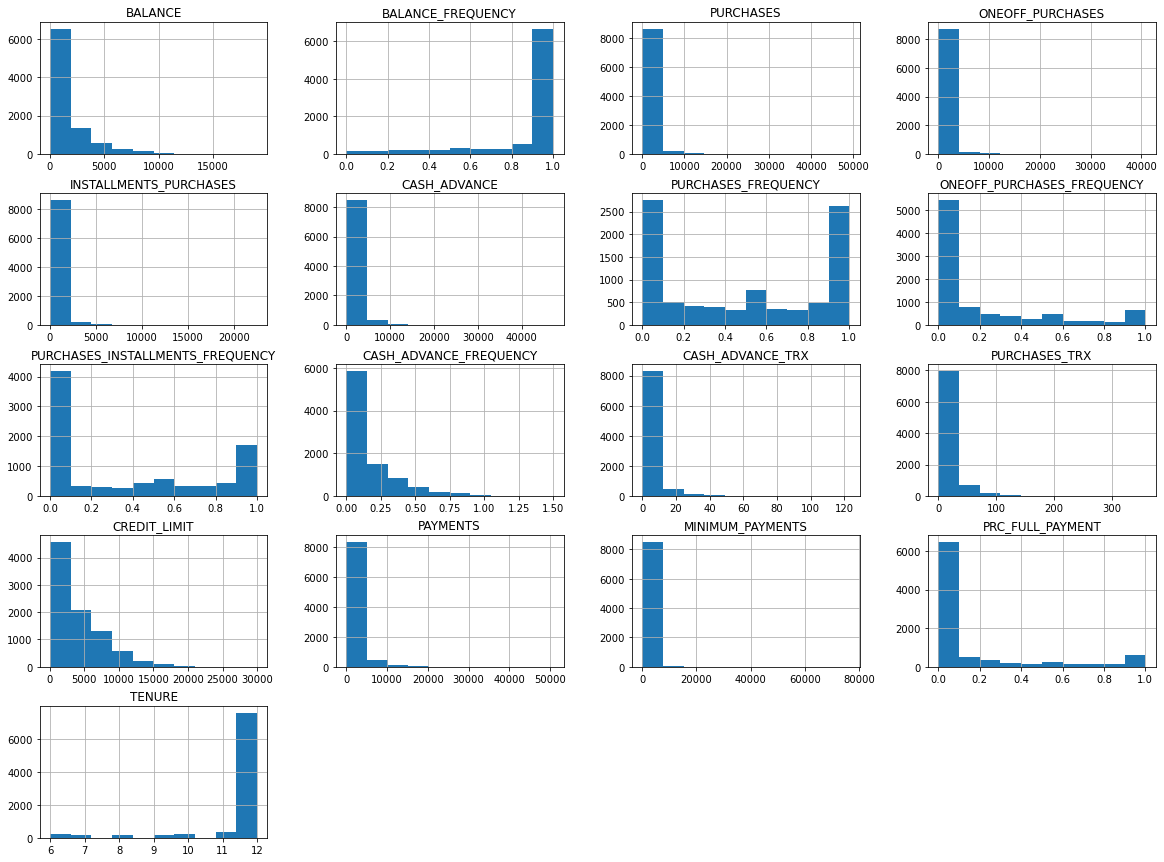

In [9]:
# See Data Distribution
df.hist(bins=10, figsize=(20,15))
plt.show()

In [10]:
# See The Correlation between cols
correlation = df.corr()
correlation

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


In [11]:
# See the most correlated column
(np.abs(correlation) > 0.6).sum()


BALANCE                             1
BALANCE_FREQUENCY                   1
PURCHASES                           5
ONEOFF_PURCHASES                    2
INSTALLMENTS_PURCHASES              3
CASH_ADVANCE                        3
PURCHASES_FREQUENCY                 2
ONEOFF_PURCHASES_FREQUENCY          1
PURCHASES_INSTALLMENTS_FREQUENCY    2
CASH_ADVANCE_FREQUENCY              3
CASH_ADVANCE_TRX                    3
PURCHASES_TRX                       3
CREDIT_LIMIT                        1
PAYMENTS                            2
MINIMUM_PAYMENTS                    1
PRC_FULL_PAYMENT                    1
TENURE                              1
dtype: int64

##  As shown above "PURCHASES" and 'CASH_ADVANCE' and some other cols are highly correlated with some cols

<AxesSubplot:>

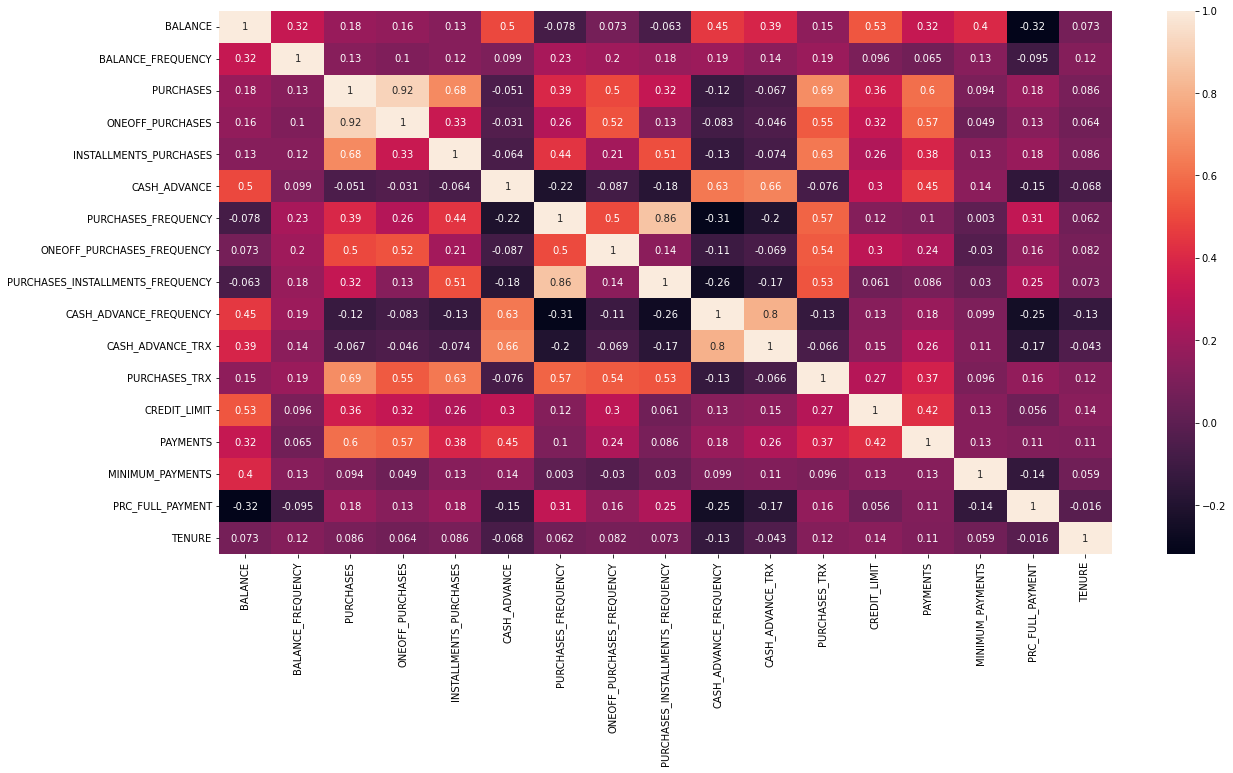

In [12]:
# See visually correlation between features
plt.figure(figsize=(20,10))
sns.heatmap(df.iloc[:,1:].corr(),annot = True)

# 2.  Data Cleaning and Preparation 


In [13]:
# Drop Customer ID
df_copy = df.copy()
df_copy = df_copy.drop(columns = 'CUST_ID')
df_copy

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [14]:
# Impute Nulls with median

cols_to_fill = ['MINIMUM_PAYMENTS','CREDIT_LIMIT']
df_copy = filling_nulls(df_copy,cols_to_fill)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [15]:
round(df_copy.isnull().sum(axis = 0)*100/df_copy.shape[0],2)

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

# Normalizing the Data For PCA


In [17]:
normalized_df = Normalizer().fit_transform(df_copy)
normalized_df.shape

(8950, 17)

In [18]:
# Checking highest variation as a cummulative value to reach to appropriate No. of components
pca = PCA().fit(normalized_df)

print(pca.explained_variance_ratio_.cumsum())

[0.33477382 0.61278606 0.77711397 0.86339435 0.93736956 0.98865981
 0.9999257  0.99995938 0.99998225 0.99999601 0.99999982 0.99999991
 0.99999995 0.99999998 1.         1.         1.        ]


# As shown above almost 99% of the data are in the first 7 components

In [19]:
# reduce the dimensions to be 7 instead of 17
pca = PCA(n_components=7).fit_transform(normalized_df)
pca.shape

(8950, 7)

## Choosing best no. of clusters depending on ELBOW graph

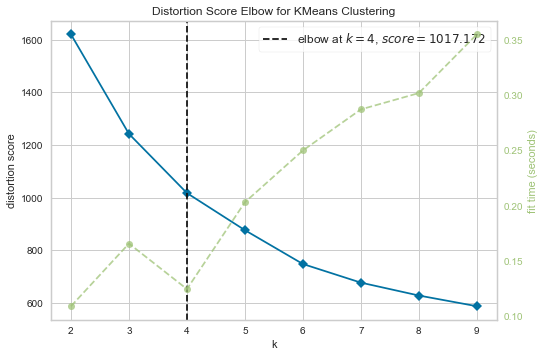

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer
visualalizer = KElbowVisualizer(KMeans(), k=(2,10))
visualalizer.fit(pca)
visualalizer.show()

## As shown above 4 and 7 will be good choice for no. of clusters
## Let's try both and compare scores

In [26]:
# Preparing Different Models 
hac = AgglomerativeClustering(4)
km = KMeans(4)
gm = GaussianMixture(4)

# Fitting models
hac.fit(pca)
km.fit(pca)
gm.fit(pca)



GaussianMixture(n_components=4)

[[0.         0.00094505]
 [0.         0.00094505]
 [0.         0.00119391]
 ...
 [0.         0.27239364]
 [0.         0.27347962]
 [0.         0.31748374]]


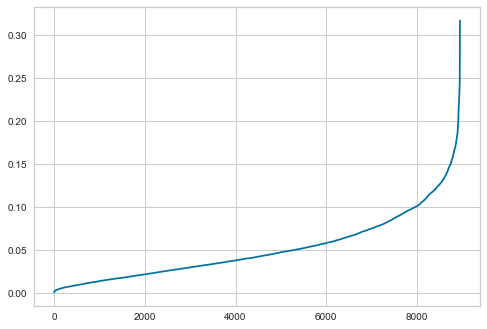

In [27]:
# Visulizing distances to choose optimal eps for DBscan
choose_eps(pca)

In [28]:
db = DBSCAN(eps=0.2, min_samples=5)
db.fit(pca)

DBSCAN(eps=0.2)

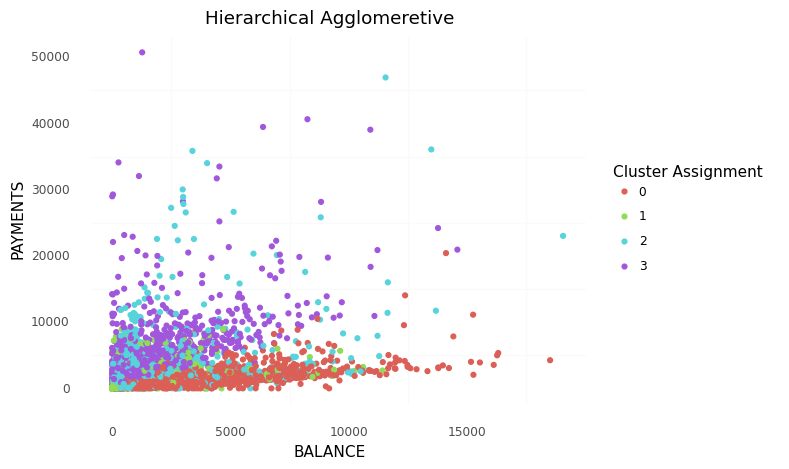

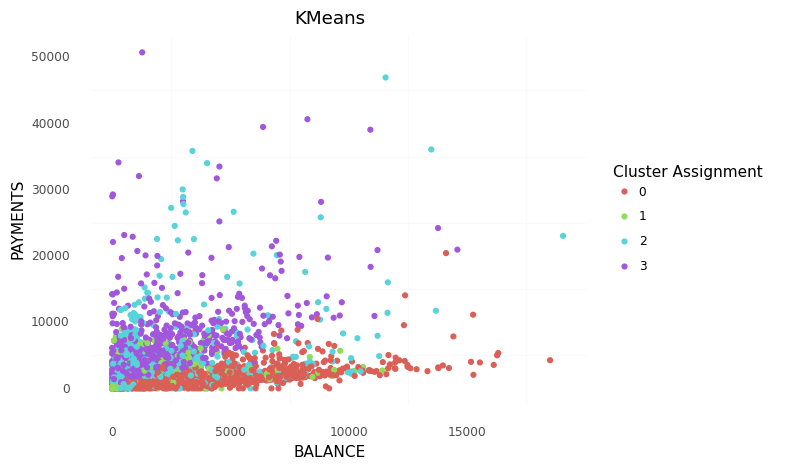

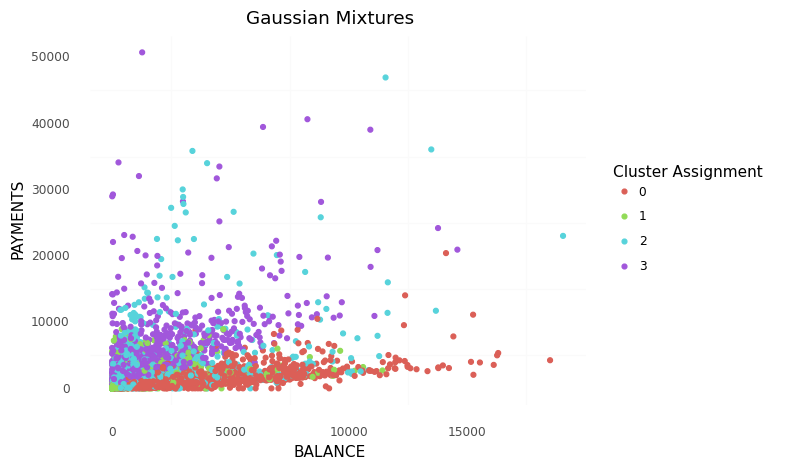

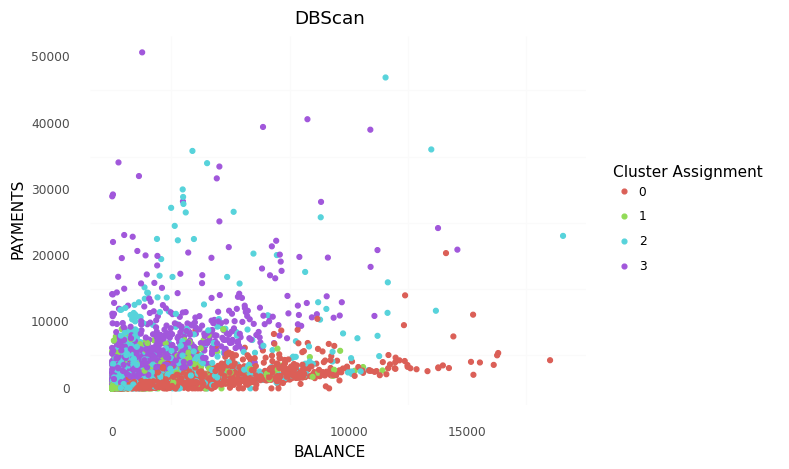

In [29]:
df_copy["hac"] = hac.labels_
df_copy["km"] = km.labels_
df_copy["gm"] = gm.predict(pca)
df_copy['db'] = db.labels_

print(ggplot(df_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(df_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(df_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

print(ggplot(df_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBScan"))



## I tried to visualize some features to see clustering but it's hard to see relation because it's high dimensional data 

## So let's compare silhouette scores

In [30]:
# Calculating Silhouete Scores 
score1 = silhouette_score(normalized_df,df_copy['km'])
print("Score for K-means is ",round(score1,2))
score2 = silhouette_score(normalized_df,df_copy['hac'])
print("Score for Agglomrative is ",round(score2,2))
score3 = silhouette_score(normalized_df,df_copy['db'])
print("Score for DBscan is ",round(score3,2))
score4 = silhouette_score(normalized_df,df_copy['gm'])
print("Score for Gaussian Mixture is ",round(score4,2))


Score for K-means is  0.35
Score for Agglomrative is  0.32
Score for DBscan is  0.02
Score for Gaussian Mixture is  0.16


## So when choosing 7 components from pca K-means Algorithm has the best Score among the different algos. with 0.35 score
 
## Let's try with 4 Components

In [31]:
# reduce the dimensions to be 4 instead of 17
pca2 = PCA(n_components=4).fit_transform(normalized_df)
pca2.shape

(8950, 4)

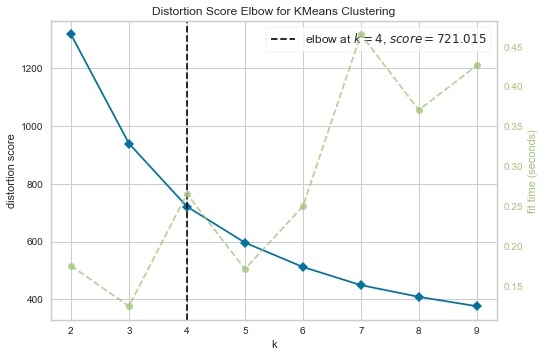

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [90]:
visualalizer = KElbowVisualizer(KMeans(), k=(2,10))
visualalizer.fit(pca2)
visualalizer.show()

In [32]:
# Preparing Different Models 
hac = AgglomerativeClustering(4)
km = KMeans(4)
gm = GaussianMixture(4)

# Fitting models
hac.fit(pca2)
km.fit(pca2)
gm.fit(pca2)


GaussianMixture(n_components=4)

[[0.         0.00094505]
 [0.         0.00094505]
 [0.         0.00119391]
 ...
 [0.         0.27239364]
 [0.         0.27347962]
 [0.         0.31748374]]


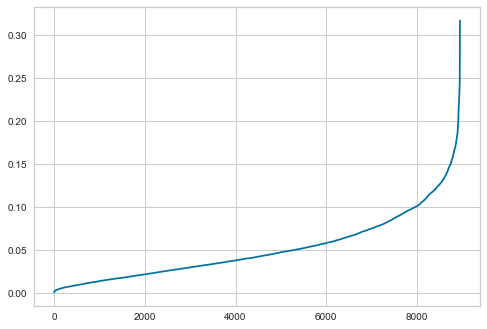

In [102]:
# Visulizing distances to choose optimal eps for DBscan
choose_eps(pca)

In [33]:
db = DBSCAN(eps=0.2, min_samples=5)
db.fit(pca2)

DBSCAN(eps=0.2)

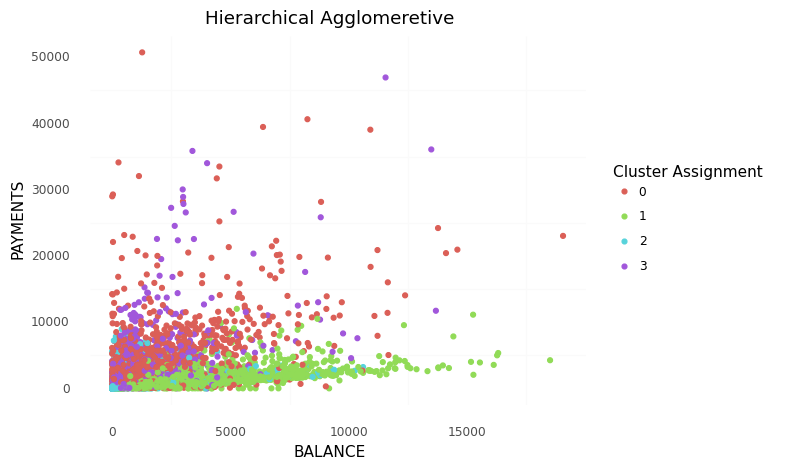

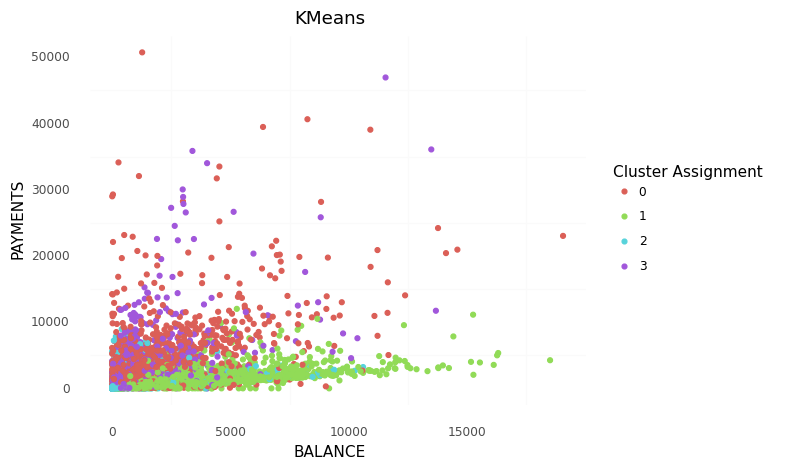

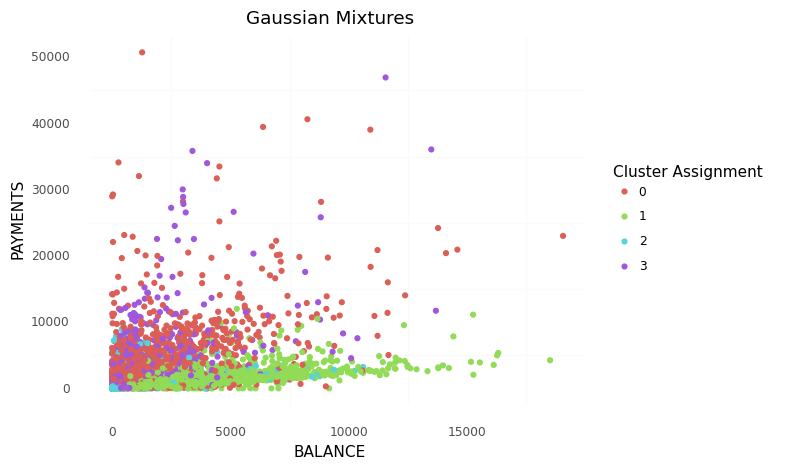

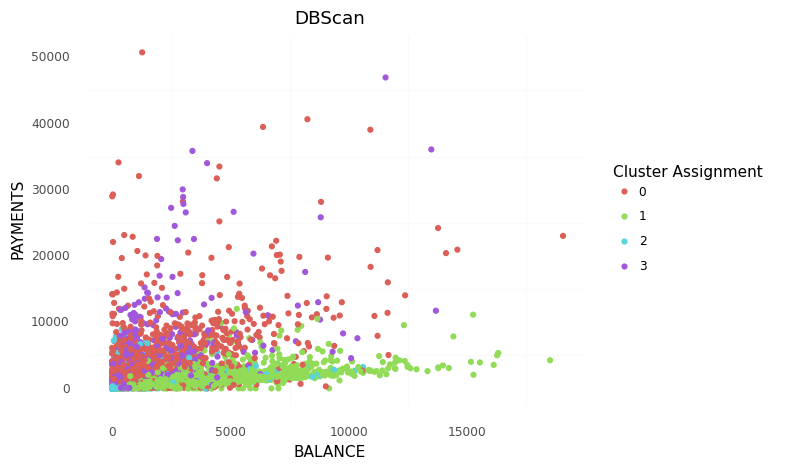

In [34]:
df_copy["hac"] = hac.labels_
df_copy["km"] = km.labels_
df_copy["gm"] = gm.predict(pca2)
df_copy['db'] = db.labels_

print(ggplot(df_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(df_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(df_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

print(ggplot(df_copy, aes(x = "BALANCE", y = "PAYMENTS",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBScan"))



In [35]:
# Calculating Silhouete Scores 
score1 = silhouette_score(normalized_df,df_copy['km'])
print("Score for K-means is ",round(score1,2))
score2 = silhouette_score(normalized_df,df_copy['hac'])
print("Score for Agglomrative is ",round(score2,2))
score3 = silhouette_score(normalized_df,df_copy['db'])
print("Score for DBscan is ",round(score3,2))
score4 = silhouette_score(normalized_df,df_copy['gm'])
print("Score for Gaussian Mixture is ",round(score4,2))


Score for K-means is  0.35
Score for Agglomrative is  0.31
Score for DBscan is  0.32
Score for Gaussian Mixture is  0.2


## It seems good with all algoritms when choosing 4 components

##  Conclusion :
1. Choose 4 or 7 dimension from PCA
2. Data can be clustered into 4 clusters 
3. K-Means and DBscan will be Good for the problem